# Pymaceuticals, Inc.
---
## Analysis Summary <br>
Purpose of this analysis is the review the performance of Pymaceutical's drug of interest, Capomulin, against other treatment regimens.
* As a first step, data preparation activities were performed by reviewing the animal study dataset for duplicate data and removed if any present. A clean data set is prepared.
* As Next step, data is reviewed for 
    * Normality - Generated a summary statistic for tumor volume to review the normality of the data by using measure of central tendency
    * Volume of the data is equally distributed - that is by reviewing the number of mice tested across each treatment drug using bar chart
    * Checking the qualitative characteristics is equally distributed - Using a pie chart reviewing the female vs male distribution of mice
* Then the top performed 4 drugs were chosen and reviewed the data for outliers to ensure the results are reliable
* And finally, a little detailed correlation and regression analysis performed on the drug of interest, Capomulin 

---
## Conclusion
* Based on the Summary Statistics analysis for Tumor Volume, it is evident that the four drugs Capomulin, Ramicane, Infubinol, and Ceftamin have normal data distribution as there is minor and/or approximate equal mean and Median, low variance, low std dev and low std err when compared to other treatment drugs.
* Infubinol, and Ceftamin have little lower mice count tested when compared to Capomulin and Ramicane.
* It is evident from qualitative characteristics comparison that mice are almost equally distributed between male and female
* Also from the box blot analysis, it is evident that the data set considered for these four drugs Capomulin, Ramicane, Infubinol, and Ceftamin treatment drugs is reliable, as it has NO OUTLIERS except for Infubinol which also has only one outlier.
* Based on Capomulin drug detailed analysis it is evident that as mice weight increase, tumor volume also increased.

## Dependencies and setup

In [1]:
# Import required Packages/Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import os

# Get the path of the data sheet
mouse_metadata_path = os.path.join(os.getcwd(),'data','Mouse_metadata.csv')
study_results_path =os.path.join(os.getcwd(),'data','Study_results.csv')

# Read the CSV file and store the data in a data frame
MouseMetadataDF = pd.read_csv(mouse_metadata_path)
StudyResultsDF = pd.read_csv(study_results_path)

# Merge both mouse metadata and study results data frames - for the study resul associte the mouse details
# left join helps to preserve left table key id and maps the respective data from right side table
MouseStudyResultsDF = pd.merge(StudyResultsDF,MouseMetadataDF,how = 'left',on=('Mouse ID','Mouse ID'))

# Display the merged Dataframe
MouseStudyResultsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
totalMiceCount = MouseStudyResultsDF['Mouse ID'].nunique()
totalMiceCount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/

duplicateMiceID = MouseStudyResultsDF[MouseStudyResultsDF.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

# Display Mouse ID 
duplicateMiceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceDetails = MouseStudyResultsDF.loc[MouseStudyResultsDF['Mouse ID'] == duplicateMiceID[0]]

# Display Mouse ID 
duplicateMiceDetails

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Ref : https://www.statology.org/pandas-drop-rows-with-value/

cleanMouseStudyDF = MouseStudyResultsDF[MouseStudyResultsDF['Mouse ID'] != duplicateMiceID[0]]
cleanMouseStudyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanMouseStudyDF['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanTumorVolume = cleanMouseStudyDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume')
medianTumorVolume = cleanMouseStudyDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median Tumor Volume')
varTumorVolume = cleanMouseStudyDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Tumor Volume Variance')
stdTumorVolume = cleanMouseStudyDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Tumor Volume Std. Dev.') 
SEMTumorVolume = cleanMouseStudyDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('Tumor Volume Std. Err.')

# Assemble the resulting series into a single summary DataFrame.
SummaryStatistics = pd.DataFrame([meanTumorVolume,medianTumorVolume,varTumorVolume,stdTumorVolume,SEMTumorVolume]).T

# Display the summary statistics dataframe
SummaryStatistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

SummaryStatisticsAgg = cleanMouseStudyDF.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
# Display the summary statistics dataframe
SummaryStatisticsAgg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

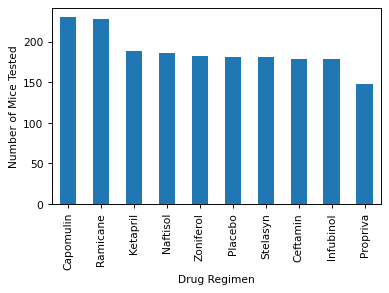

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Ref :https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# Ref: https://learningactors.com/how-to-make-better-looking-charts-in-python/

# Setting the figure and font size
plt.figure(figsize=(5,3),dpi=85)
plt.rc('font', size=9)

# Create a bar chart using dataframe.plot 
barChart = cleanMouseStudyDF.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False).plot(kind='bar',rot=90)
# Set axis labels for the bar chart and add semicolon at the end to remove output text content
barChart.set_xlabel('Drug Regimen')
barChart.set_ylabel('Number of Mice Tested');

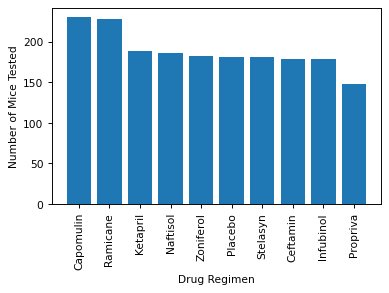

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Create an array with with total number of timepoint for all mice tested for each durg regimen
totalNumberofTimepoints = np.array(cleanMouseStudyDF.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False))
#Create a list of lables that should be used as xaxis ticks
xaxislabel = cleanMouseStudyDF.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False).index.tolist()

# Setting the figure and font size
plt.figure(figsize=(5,3), dpi=85)
plt.rc('font', size=9)

#Create a bar plot 
plt.bar(xaxislabel,totalNumberofTimepoints,align='center')

# Set axis lables and ticks display direction
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)

# Display the plot
plt.show()


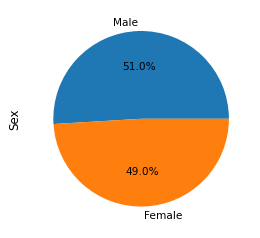

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Ref: https://matplotlib.org/stable/gallery/color/named_colors.html
# Ref: https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html

# Setting the figure size and facecolor
plt.figure(figsize=(9,3),dpi=95, facecolor=(0,0,0,0))

# Creating pie chart using dataframe.plot
cleanMouseStudyDF.groupby('Sex')['Sex'].count().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',fontsize=8);


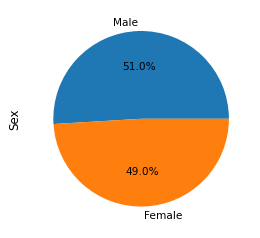

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Ref : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

#Create list of distribution of female versus male mice
FemalevsMaleMice = np.array(cleanMouseStudyDF.groupby('Sex')['Sex'].count().sort_values(ascending=False))
#Create list of labels distribution of female versus male mice
FemalevsMaleMiceLabels = cleanMouseStudyDF.groupby('Sex')['Sex'].count().sort_values(ascending=False).index.tolist()

# Setting the figure size and facecolor
plt.figure(figsize=(9,3),dpi=95, facecolor=(0,0,0,0))
# Creating pie chart using matplotlib.pyplot
plt.pie(FemalevsMaleMice,labels=FemalevsMaleMiceLabels, autopct='%1.1f%%',textprops={'fontsize': 8})

# set y-axis lable
plt.ylabel('Sex')

# Display the pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimepointByMouse = pd.DataFrame(cleanMouseStudyDF.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint':'LastTimepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
MergeDF = pd.merge(cleanMouseStudyDF,greatestTimepointByMouse,how='left',on=['Mouse ID','Mouse ID'])


In [14]:
# Ref: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
# Ref:https://www.statology.org/pandas-query-column-name-with-space/

# Put treatments into a list for for loop (and later for plot labels)
MostPromisingTreatmentList = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
MostPromisingTreatmentsDF = pd.DataFrame(MergeDF.query(f'`Drug Regimen` == {MostPromisingTreatmentList} & Timepoint == LastTimepoint')).sort_values('Tumor Volume (mm3)')
MostPromisingTreatmentsDF.reset_index(inplace=True,drop=True)

# Create empty list to fill with tumor vol data (for plotting)
TumorVolumeData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Loop through each drug in the treatment list, 
    # Locate the rows which contain mice on each treament name and get the tumor volumes
for eachTreamentName in MostPromisingTreatmentList:
           
    # add subset
        #locating the rows in the MostPromisingTreament DataFrame that correspond to each treatment
        eachTreamentDF = MostPromisingTreatmentsDF.loc[MostPromisingTreatmentsDF['Drug Regimen'] == eachTreamentName]
        eachTreamentTumorVolume = eachTreamentDF['Tumor Volume (mm3)']

        #Append the resulting final tumor volumes for each treament name to the empty list
        TumorVolumeData.append(eachTreamentTumorVolume)
        
        # Calculate the quartiles, IQR, lower and upper bound
        # Ref:Course Material - Day3_Matplotlib_Thursday
        quartiles = eachTreamentTumorVolume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        # Determine outliers using upper and lower bounds
        potential_outlier = eachTreamentDF.query(f'`Tumor Volume (mm3)` <= {lower_bound} or `Tumor Volume (mm3)` >= {upper_bound}')['Tumor Volume (mm3)']
        print(f"{eachTreamentName}'s potential outliers:  {potential_outlier}")

Capomulin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:  21    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)


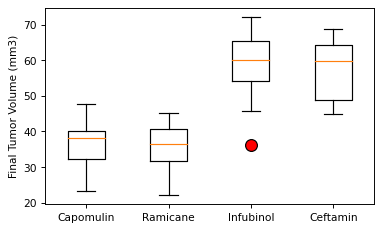

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Ref: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
# https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html

# Setting the figure and font size
plt.figure(figsize=(5,3), dpi=85)
plt.rc('font', size=9)

# Plotting the box plot
plt.boxplot(TumorVolumeData,labels=MostPromisingTreatmentList,flierprops=dict(markerfacecolor='r', marker='o', markersize=10))

# Setting y-axis label
plt.ylabel('Final Tumor Volume (mm3)')

# Display the box plot
plt.show()


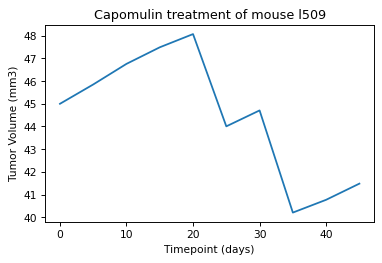

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse that was treated with Capomulin, and generate a line plot of tumor volume verss time point for that mouse.

# setting the figure and font size
plt.figure(figsize=(5,3), dpi=85)
plt.rc('font', size=9)

#Select a mouse that was treated with Capomulin - Mouse ID l509 is choosen
CapomulinMouseIDl509DF = cleanMouseStudyDF.loc[cleanMouseStudyDF['Mouse ID'] == 'l509']

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(CapomulinMouseIDl509DF['Timepoint'],CapomulinMouseIDl509DF['Tumor Volume (mm3)'])

# Setting axis labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# Display the plot
plt.show()


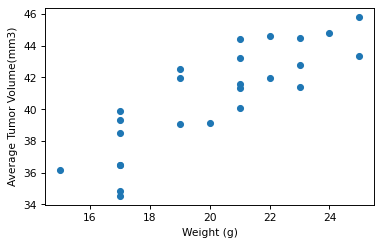

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinDF = cleanMouseStudyDF.loc[cleanMouseStudyDF['Drug Regimen'] == 'Capomulin']
CapomulinAvgTumorVolume = CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
CapomulinMouseWeight = CapomulinDF.groupby('Mouse ID')['Weight (g)'].mean()

# setting the figure and font size
plt.figure(figsize=(5,3), dpi=85)
plt.rc('font', size=9)
plt.rc('figure', facecolor= 'w');

# Generating scatter plot
plt.scatter(CapomulinMouseWeight, CapomulinAvgTumorVolume, s=25)

# Setting axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


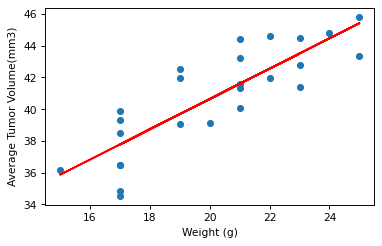

In [18]:
# Ref: Class Material-Day3_Matplotlib_Thursday_06-Ins_Correlation_Conundrum
# Ref: Class Material-Day3_Matplotlib_Thursday_08-Ins_Fits_and_Regression
#**************************************************************************#

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Calculate the correlation coefficient
correlation = st.pearsonr(CapomulinMouseWeight,CapomulinAvgTumorVolume)
# print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CapomulinMouseWeight, CapomulinAvgTumorVolume)
regress_values = CapomulinMouseWeight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# setting the figure and font size
plt.figure(figsize=(5,3), dpi=85)
plt.rc('font', size=9)

# Generating scatter plot and regression model
plt.scatter(CapomulinMouseWeight, CapomulinAvgTumorVolume, s=25)
plt.plot(CapomulinMouseWeight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Setting axis labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')

# Display the plot
plt.show()